<a href="https://colab.research.google.com/github/Vic-bit/aprMaqI_CEIA/blob/main/AprMaq1_TP_final_copiaVic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

url = "https://raw.githubusercontent.com/Vic-bit/analisis_de_datos_CEIA/main/trabajo_final/data_playlist.csv"
data_playlist = pd.read_csv(url)

In [19]:
data_playlist.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,label
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143,1
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582,1
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199,1
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798,1
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288,1


In [20]:
VARIABLE_ENTRADA_CUALI = ['key','mode','time_signature']
VARIABLE_ENTRADA_CUANTI =  ['acousticness','danceability','duration','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
SALIDA=['label']

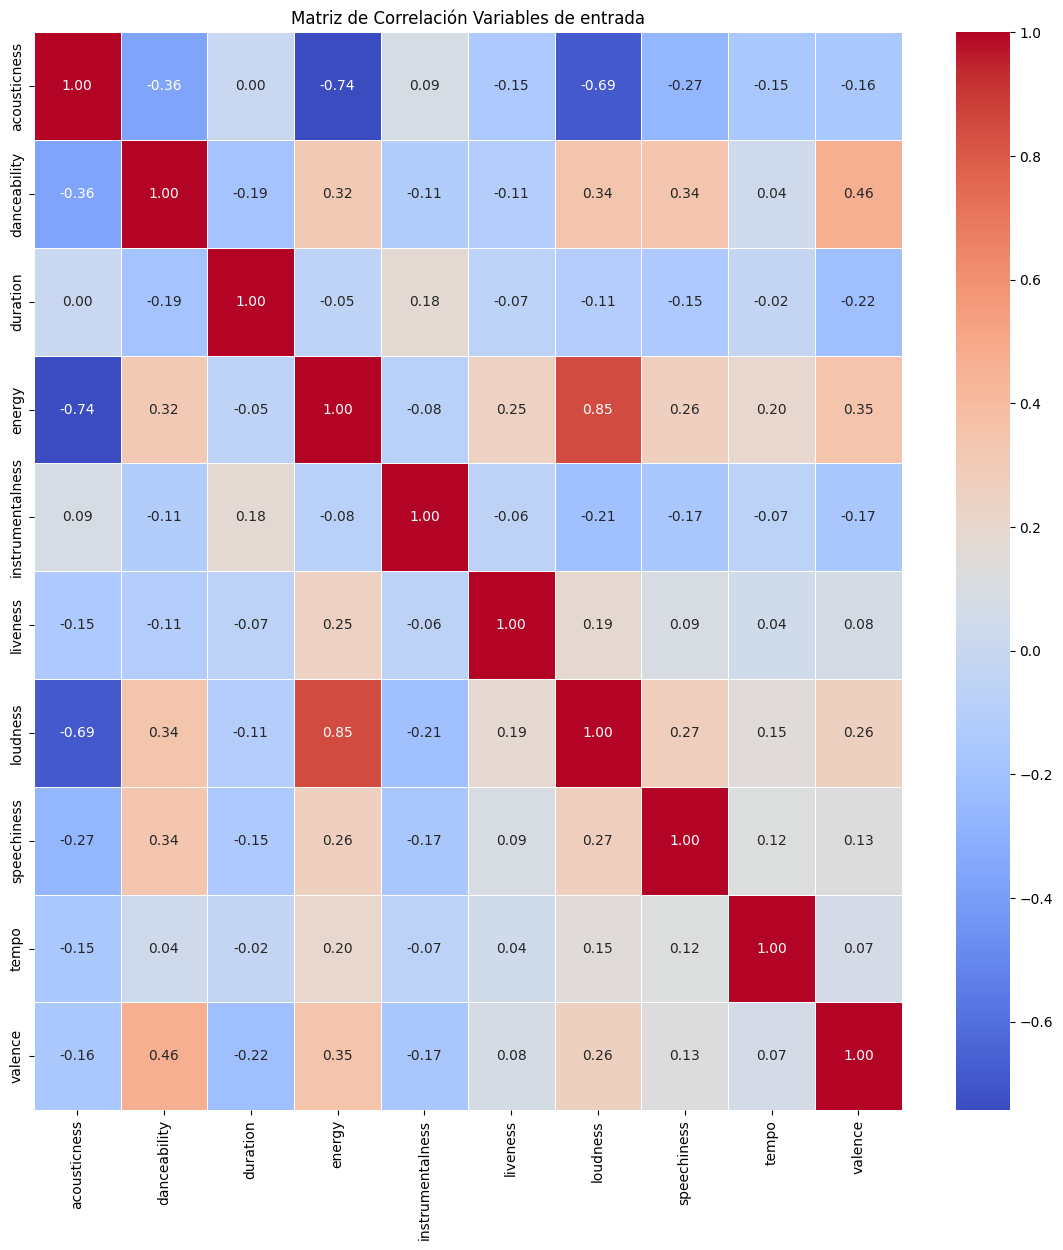

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_playlist[VARIABLE_ENTRADA_CUANTI].corr(method='spearman')
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación Variables de entrada')
plt.show()

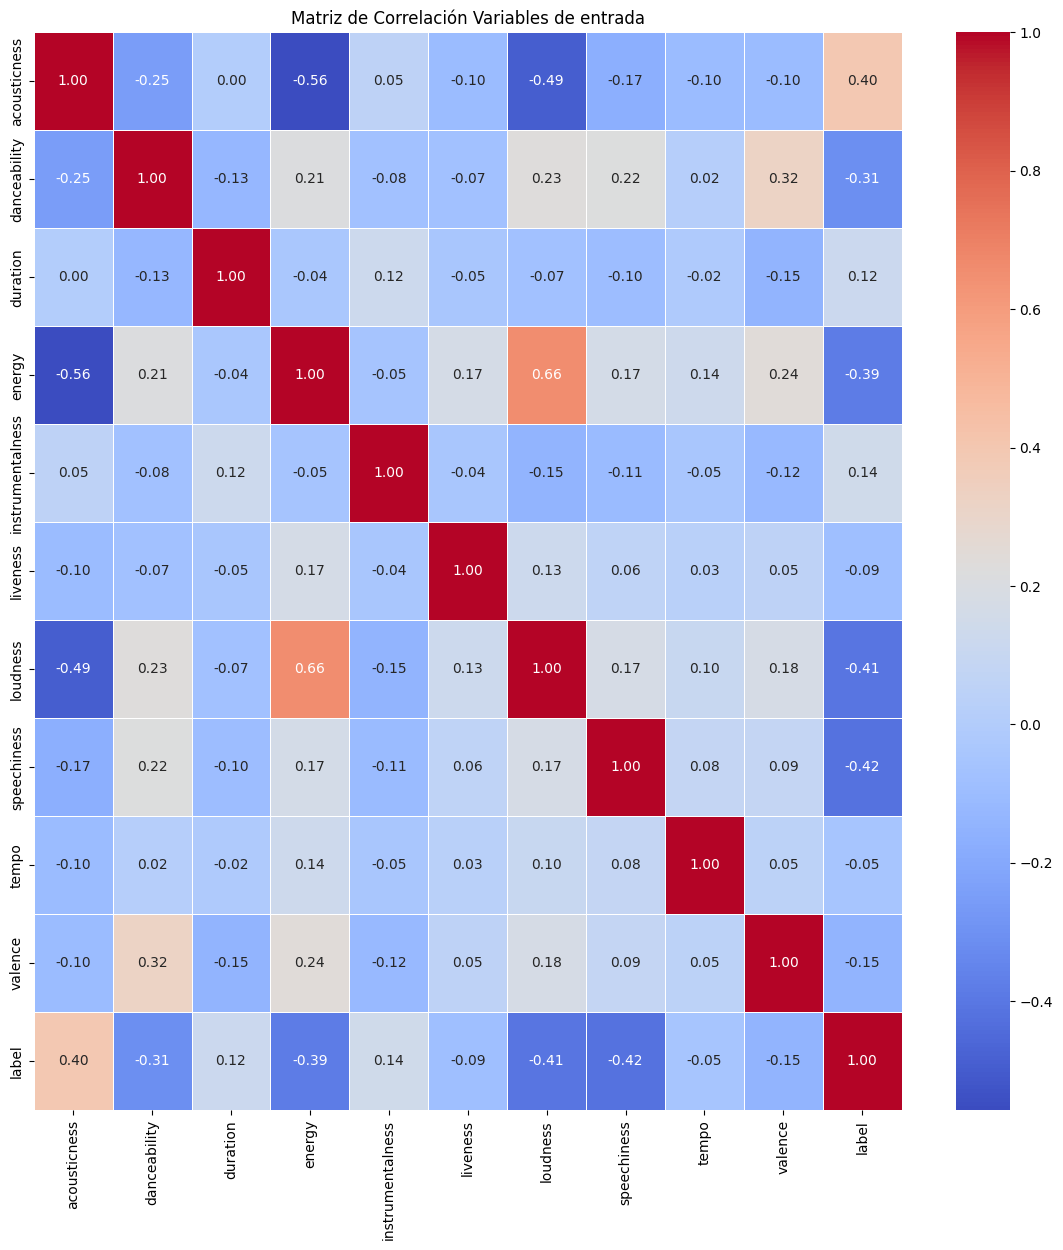

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_playlist[VARIABLE_ENTRADA_CUANTI + SALIDA].corr(method='kendall')
plt.figure(figsize=(14, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación Variables de entrada')
plt.show()

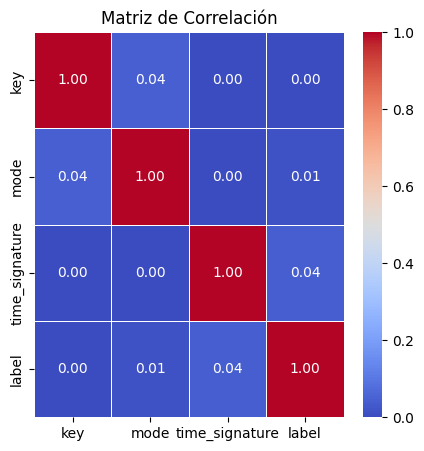

In [23]:
from sklearn.feature_selection import mutual_info_regression

def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0]


correlation_matrix = data_playlist[VARIABLE_ENTRADA_CUALI + SALIDA].corr(method=custom_mi_reg)
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [24]:
HIGH_LINEAR_CORRELATION_VARIABLES= ['danceability','energy','speechiness']
data_valuable = data_playlist[HIGH_LINEAR_CORRELATION_VARIABLES + SALIDA]

In [25]:
data_valuable.head()

,danceability,energy,speechiness,label
0,0.514,0.521,0.0444,1
1,0.714,0.614,0.0319,1
2,0.630,0.455,0.0292,1
3,0.810,0.221,0.0429,1
4,0.465,0.459,0.0351,1


In [26]:
data_valuable.describe()

,danceability,energy,speechiness,label
count,750.000000,750.000000,750.000000,750.000000
mean,0.596439,0.594188,0.098966,0.602667
std,0.172036,0.253301,0.104715,0.489673
min,0.107000,0.009250,0.023400,0.000000
25%,0.480000,0.423250,0.035900,0.000000
50%,0.606000,0.631500,0.048750,1.000000
75%,0.715750,0.804750,0.113000,1.000000
max,0.986000,0.995000,0.721000,1.000000


In [27]:
from sklearn.preprocessing import PowerTransformer
for i, col in enumerate(data_valuable[HIGH_LINEAR_CORRELATION_VARIABLES].columns):
  data_valuable[col] =  PowerTransformer().fit_transform(data_valuable[col].to_numpy().reshape((-1, 1))) #yeo-johnson

/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1109/2207585348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_valuable[col] =  PowerTransformer().fit_transform(data_valuable[col].to_numpy().reshape((-1, 1))) #yeo-johnson
/var/folders/rz/52wvyybx3618hlzk3v9hjvdc0000gn/T/ipykernel_1109/2207585348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_valuable[col] =  PowerTransformer().fit_transform(data_valuable[col].to_numpy().reshape((-1, 1))) #yeo-johnson
/var/folders/rz/52wvyybx36

In [28]:
data_valuable.describe()

,danceability,energy,speechiness,label
count,7.500000e+02,7.500000e+02,7.500000e+02,750.000000
mean,4.014566e-16,1.965835e-16,2.297422e-16,0.602667
std,1.000667e+00,1.000667e+00,1.000667e+00,0.489673
min,-2.481447e+00,-1.960501e+00,-1.285083e+00,0.000000
25%,-7.187568e-01,-7.593564e-01,-8.148002e-01,0.000000
50%,-1.195300e-03,4.994525e-02,-4.084284e-01,1.000000
75%,6.744885e-01,8.334856e-01,8.421253e-01,1.000000
max,2.540577e+00,1.813059e+00,1.887941e+00,1.000000


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = data_valuable[HIGH_LINEAR_CORRELATION_VARIABLES]
y = data_valuable[SALIDA]
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)
y_train= y_train.ravel()
print('Los datos de X_train tienen una dimensión de: ', X_train.shape)
print('Los datos de X_test tienen una dimensión de: ', X_test.shape)
print('Los datos de y_train tienen una dimensión de: ', y_train.shape)
print('Los datos de y_test tienen una dimensión de: ', y_test.shape)

Los datos de X_train tienen una dimensión de:  (600, 3)
Los datos de X_test tienen una dimensión de:  (150, 3)
Los datos de y_train tienen una dimensión de:  (600,)
Los datos de y_test tienen una dimensión de:  (150, 1)


REGRESIÓN LOGÍSTICA

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler() #Llamamos al objeto

X_train = sc_X.fit_transform(X_train) #Usamo el método del sc para entrenar con X_train sin escalar, pero lo transformamos
X_test = sc_X.fit_transform(X_test) #Usamo el método del sc para entrenar con X_test sin escalar, pero lo transformamos

In [15]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(X_train, y_train)

print(f"Porcentaje de muestras bien clasificadas usando todos los atributos: {(regression.score(X_test, y_test)*100)}%")

Porcentaje de muestras bien clasificadas usando todos los atributos: 80.66666666666666%


In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = regression.predict(X_test)

cm_lr = confusion_matrix(y_test, y_pred_test)
P = np.sum(cm_lr[1, :])
N = np.sum(cm_lr[0, :])
TP = cm_lr[1, 1]
TN = cm_lr[0, 0]

In [17]:
from sklearn.metrics import precision_score,f1_score

print(f"Precision: {precision_score(y_test, y_pred_test, zero_division=0)}")
print(f"F1-score: {f1_score(y_test, y_pred_test, zero_division=0)}")

Precision: 0.8602150537634409
F1-score: 0.8465608465608465


Text(0.5, 1.0, 'Clasificador Naive')

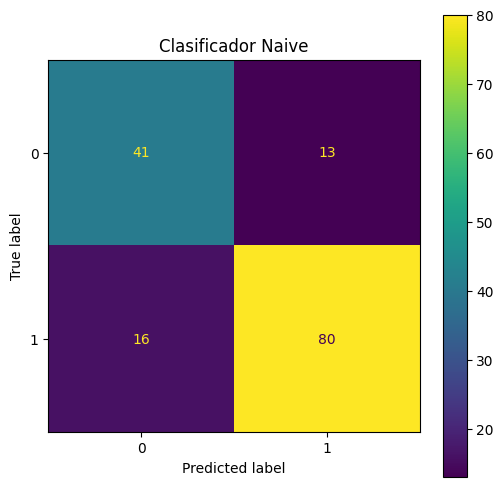

In [18]:
prediccion_naive = np.zeros_like(y_test) 
cm_naive = confusion_matrix(y_test, prediccion_naive)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr,
                              display_labels=regression.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive")

Curva ROC

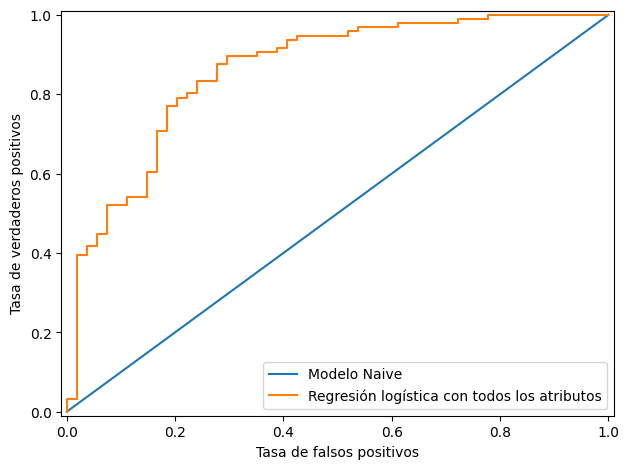

In [19]:
prob_lr = regression.predict_proba(X_test)[:, -1]
prob_naive = np.zeros_like(prob_lr)

from sklearn.metrics import auc, roc_curve
fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive)
fpr_total, tpr_total, _ = roc_curve(y_test, prob_lr)

plt.plot(fpr_naive, tpr_naive, label="Modelo Naive") #Modelo ficticio
plt.plot(fpr_total, tpr_total, label="Regresión logística con todos los atributos")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

KNN

In [36]:
#KNN con 7 vecinos
from sklearn.neighbors import KNeighborsClassifier

classifier_knn_total = KNeighborsClassifier(n_neighbors=7, metric="minkowski", p=2)
classifier_knn_total.fit(X_train, y_train) #p=2 distancia euclediana

y_pred= classifier_knn_total.predict(X_test)

print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
print(f"F1-scores: {f1_score(y_test, y_pred, zero_division=0)}")

cm_knn = confusion_matrix(y_test, y_pred)
P = np.sum(cm_knn[1,:])
N = np.sum(cm_knn[0,:])
TP = cm_knn[1,1]
TN = cm_knn[0,0]

Precision: 0.8469387755102041
F1-scores: 0.8556701030927835


In [47]:
# MEJOR OBTENIDO
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import GridSearchCV

#Hiperparámetros
k_range = list(range(3, 10, 2))
param_grid = dict(n_neighbors=k_range)
print("El hiperarámetro a evaluar es el valor de k: ",param_grid)

#Clasificador
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5)
grid.fit(X_train, y_train)
best_clf = grid.best_estimator_
y_pred = best_clf.predict(X_test)

# Calculo de precision y F1-score
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Resultados
print("Mejor hiperparámetro encontrado:", grid.best_params_)
print("Precisión en conjunto de prueba:", precision)
print("F1-score en conjunto de prueba:", f1)


El hiperarámetro a evaluar es el valor de k:  {'n_neighbors': [3, 5, 7, 9]}
Mejores hiperparámetros encontrados: {'n_neighbors': 3}
Precisión en conjunto de prueba: 0.7543732057416268
F1-score en conjunto de prueba: 0.7538191075459916


In [50]:
# Matriz de confusión
prediccion_naive = np.zeros_like(y_test) 
cm_naive = confusion_matrix(y_test, prediccion_naive)
cm_knn = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=grid.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador KNN")

AttributeError: 'KNeighborsClassifier' object has no attribute 'classes_'

AUC ROC: 0.8270640432098766


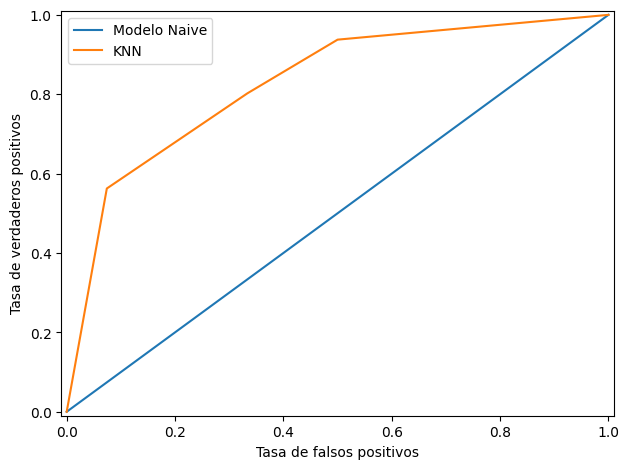

In [51]:
# Curva ROC
from sklearn.metrics import auc, roc_curve
prob_knn = grid.predict_proba(X_test)[:, -1]
prob_naive = np.zeros_like(prob_knn)

fpr_naive, tpr_naive, _ = roc_curve(y_test, prob_naive)
fpr_total, tpr_total, _ = roc_curve(y_test, prob_knn)
roc_auc = auc(fpr_total, tpr_total)

# Mostrar la matriz de confusión y el área bajo la curva ROC
print("AUC ROC:", roc_auc)

plt.figure
plt.plot(fpr_naive, tpr_naive, label="Modelo Naive") #Modelo ficticio
plt.plot(fpr_total, tpr_total, label="KNN")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();

In [38]:
#Con tabla comparativa.
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt 
import numpy as np

# import module
from tabulate import tabulate
resultados = {}
count = 0
k_range = list(range(3, 10, 2))
param_grid = dict(n_neighbors=k_range)
cv_scores = []
precisions = []
f1_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=2) #
    knn.fit(X_train, y_train) #p=2 distancia euclediana
    y_pred= knn.predict(X_test)
    
    scores_knn = round(cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=5).mean(),3)
    print(f"Cross-validation score: {scores_knn}")
    cv_scores.append(scores_knn)

    print(f"Valor del parámetro k = {k}")
    precision_knn = round(precision_score(y_test, y_pred, zero_division=0),3)
    print(f"Precision: {precision_knn}")
    precisions.append(precision_knn)

    f1_score_knn = round(f1_score(y_test, y_pred, zero_division=0),3)
    print(f"F1-scores: {f1_score_knn}")
    f1_scores.append(f1_score_knn)
    
    resultados[k] = {
        "k": k,
        "Cross-validation score": scores_knn,
        "Precision": precision_knn,
        "F1-scores": f1_score_knn
    }
    count = count + 1

# create header
head = [k_range]

# assign data
mydata = [
    k_range,
    cv_scores, 
    precisions, 
    f1_scores
]
mydata2 = list(zip(*mydata))
# display table
#print(tabulate(resultados, tablefmt="mixed_outline"))
#print(resultados)
encabezados = ["K", "Cross-Validation", "Precision", "F1-Score"]

# Imprimir la tabla usando tabulate con el diccionario directamente
print(tabulate(mydata2, headers=encabezados, floatfmt=".3f"))

Cross-validation score: 0.807
Valor del parámetro k = 3
Precision: 0.811
F1-scores: 0.806
Cross-validation score: 0.798
Valor del parámetro k = 5
Precision: 0.828
F1-scores: 0.841
Cross-validation score: 0.788
Valor del parámetro k = 7
Precision: 0.847
F1-scores: 0.856
Cross-validation score: 0.792
Valor del parámetro k = 9
Precision: 0.844
F1-scores: 0.844
  K    Cross-Validation    Precision    F1-Score
---  ------------------  -----------  ----------
  3               0.807        0.811       0.806
  5               0.798        0.828       0.841
  7               0.788        0.847       0.856
  9               0.792        0.844       0.844


In [ ]:
columns = ('CV', 'Precision', 
           'F1-scores') 
rows = k_range
the_table = plt.table(cellText=f1_scores, 
                      rowLabels=rows, 
                      colLabels=columns, 
                      loc='bottom')
plt.show()

In [30]:
from sklearn.model_selection import GridSearchCV

# Definir la cuadrícula de hiperparámetros
param_grid = {'n_neighbors': list(range(3, 14, 2))}

# Crear el clasificador KNN
knn = KNeighborsClassifier()

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Realizar la búsqueda de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros encontrados
best_k = grid_search.best_params_['n_neighbors']

# Mostrar los mejores parámetros encontrados
print("Mejor valor de K:", best_k)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Predecir en los datos de prueba usando el mejor modelo
y_pred = best_model.predict(X_test)

# Calcular la matriz de confusión y el área bajo la curva ROC
confusion_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Mostrar la matriz de confusión y el área bajo la curva ROC
print("Matriz de Confusión:")
print(confusion_matrix)
print("AUC ROC:", roc_auc)


Mejor valor de K: 3
Matriz de Confusión:
[[37 17]
 [19 77]]
AUC ROC: 0.7436342592592593


In [36]:
print(grid_search.best_params_)

{'n_neighbors': 3}


In [23]:
prediccion_naive = np.zeros_like(y_test) 
cm_naive = confusion_matrix(y_test, prediccion_naive)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn,
                              display_labels=regression.classes_)
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Naive")

NameError: name 'cm_knn' is not defined

In [24]:
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred)
plt.plot(fpr_knn, tpr_knn, label="Clasificador KNN K=23")
plt.plot([-10, 10], [-10, 10], color="gray", linestyle="--")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout();
#No tenemos umbral, podemos var la TP vs FP, es una curva roc de un
#solo punto.

NameError: name 'y_pred' is not defined

RANDOM FOREST

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=42)

scores = cross_val_score(rf, X_train, y_train, cv=5,scoring= 'accuracy')

print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_pred,y_test))

Mean Accuracy: 0.8016666666666667
Standard Deviation: 0.056862407030773256
0.82


K-MEANS

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import precision_score, f1_score

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

clusters_train = kmeans.predict(X_train)
clusters_test = kmeans.predict(X_test)

precision_train = precision_score(y_train, clusters_train, average='weighted')
f1_train = f1_score(y_train, clusters_train, average='weighted')

precision_test = precision_score(y_test, clusters_test, average='weighted')
f1_test = f1_score(y_test, clusters_test, average='weighted')

print("Precisión en train:", precision_train)
print("F1-score en train:", f1_train)
print("Precisión en test:", precision_test)
print("F1-score en test:", f1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Precisión en train: 0.8170209330704966
F1-score en train: 0.7795114570904914
Precisión en test: 0.7775075771082189
F1-score en test: 0.7318968078879834


ÁRBOLES DE DECISIÓN

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, f1_score

In [ ]:
# Definimos el clasificador
clf = DecisionTreeClassifier(random_state=42)

# Definimos la grilla de hiperparámetros a explorar
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Creamos GridSearchCV para búsqueda exhaustiva de hiperparámetros. Métrica: Precisión.
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenamos GridSearchCV
grid_search.fit(X_train, y_train)

# Obtenemos el mejor modelo
best_clf = grid_search.best_estimator_

# Predecimos en el conjunto de prueba con el mejor modelo
y_pred = best_clf.predict(X_test)

# Calculamos precision y F1-score
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Imprimimos resultados
print("Mejores hiperparámetros encontrados:", grid_search.best_params_)
print("Precisión en conjunto de prueba:", precision)
print("F1-score en conjunto de prueba:", f1)

Mejores hiperparámetros encontrados: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}
Precisión en conjunto de prueba: 0.80593658821241
F1-score en conjunto de prueba: 0.8062641034332478


Además, mostramos debajo los resultados en cuanto a la métrica de precisión para las diferentes configuraciones de hiperparámetros probadas en el entrenamiento:

In [ ]:
# Obtenemos los resultados de la búsqueda en cuadrícula
results = grid_search.cv_results_

# Mostramos las métricas con todas las configuraciones de hiperparámetros
for mean_score, params in zip(results['mean_test_score'], results['params']):
    print("Precisión:", mean_score, "Parámetros:", params)

Precisión: 0.7583333333333334 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Precisión: 0.7516666666666667 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Precisión: 0.7483333333333334 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Precisión: 0.7483333333333333 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Precisión: 0.7583333333333332 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Precisión: 0.75 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Precisión: 0.7766666666666667 Parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': N